# Data Visualisation Zone

### Things to achieve in the notebook
- Create a series of plots comparing weather to the index

In [36]:
## Import libraries

import matplotlib.pyplot as plt                               # Used for plotting data
from collections import Counter                               # This is used to count occurances of values
import pandas as pd                                           # Used for cleanly displaying data
import numpy as np                                            # Collection of mathematical functions
import tarfile                                                # Used for extracting files
import json                                                   # Processing individual JSON files uses this
import csv                                                    # This was used to create and read csvs
import string
import pickle
import os                                                     # This helped locate and delete json files
import re
import cartopy
from ast import literal_eval                                  # Used to convert strings to dict
from datetime import datetime                                 # This processes different date formats
from pandas.plotting import register_matplotlib_converters    # This had to be registered to allow for timeseries plots
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from emoji import demojize
from langdetect import detect
from multiprocessing import Process
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.model_selection import cross_val_score

register_matplotlib_converters()
pd.set_option('display.max_rows', 10)                         # Setting displayed panda length

In [46]:
tweetcount1 = Counter()                                              # Initialise counter
with open('AllHeatCSV.csv','r', encoding='utf-8') as csvfile:       # Run through lines of csv
    read = csv.reader(csvfile)
    for line in read:
        ts = int(line[0])/1000                              # Convert timestamps to ms                     
        Date = datetime.utcfromtimestamp(ts).date()                 # Turn ts into date
        tweetcount1[Date] +=1

tweetcount2 = Counter()                                              # Initialise counter
with open('Heatfilter3CSV.csv','r', encoding='utf-8') as csvfile:       # Run through lines of csv
    read = csv.reader(csvfile)
    for line in read:
        ts = literal_eval(line[1])/1000                              # Convert timestamps to ms                     
        Date = datetime.utcfromtimestamp(ts).date()                 # Turn ts into date
        tweetcount2[Date] +=1
        

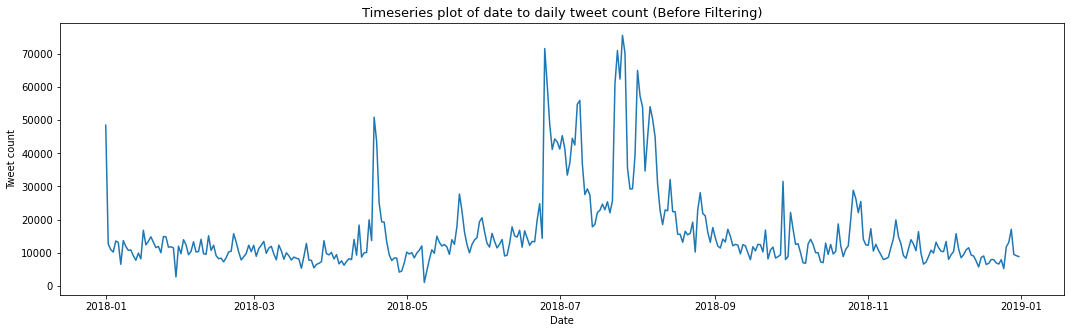

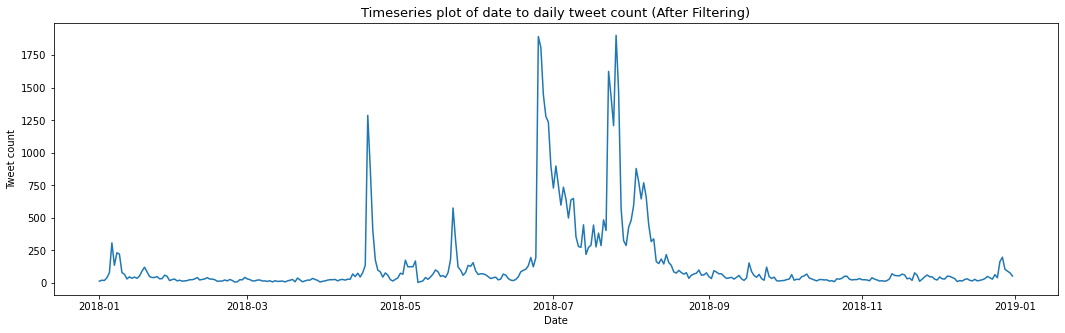

In [58]:
lists = sorted(tweetcount1.items())                                  # Sorting and seperating the data
day1, quant1 = zip(*lists)

lists = sorted(tweetcount2.items())                                  # Sorting and seperating the data
day2, quant2 = zip(*lists)

plt.figure(figsize = [18,5])
plt.plot(day1,quant1)
plt.title('Timeseries plot of date to daily tweet count (Before Filtering)', size = 13)
plt.xlabel('Date')
plt.ylabel('Tweet count')
plt.show()


plt.figure(figsize = [18,5])
plt.plot(day2,quant2)
plt.title('Timeseries plot of date to daily tweet count (After Filtering)', size = 13)
plt.xlabel('Date')
plt.ylabel('Tweet count')
plt.show()

## Located data

In [21]:
data_UK = pd.read_csv("C:/Users/beckr/Documents/Uni_Work/Masters/Advanced_Project/Data/weather/UK.csv")
data_IR = pd.read_csv("C:/Users/beckr/Documents/Uni_Work/Masters/Advanced_Project/Data/weather/Ireland.csv")
data_AU = pd.read_csv("C:/Users/beckr/Documents/Uni_Work/Masters/Advanced_Project/Data/weather/Australia.csv")
data_IN = pd.read_csv("C:/Users/beckr/Documents/Uni_Work/Masters/Advanced_Project/Data/weather/India2.csv")


data_UK['DATE'] = pd.to_datetime(data_UK['DATE'], format = '%d/%m/%Y')
data_IR['DATE'] = pd.to_datetime(data_IR['DATE'], format = '%d/%m/%Y')
data_AU['DATE'] = pd.to_datetime(data_AU['DATE'], format = '%d/%m/%Y')
data_IN['DATE'] = pd.to_datetime(data_IN['DATE'], format = '%d/%m/%Y')

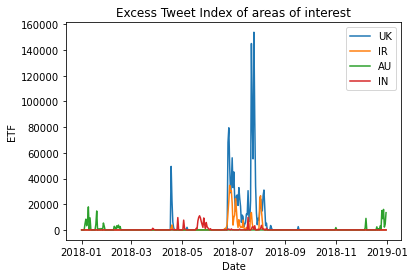

In [22]:
plt.plot(data_UK['DATE'], data_UK['ETF_new'], label = "UK")
plt.plot(data_IR['DATE'], data_IR['ETF_new'], label = "IR")
plt.plot(data_AU['DATE'], data_AU['ETF_new'], label = "AU")
plt.plot(data_IN['DATE'], data_IN['ETF_new'], label = "IN")

plt.xlabel('Date')
plt.ylabel('ETF')
plt.title('Excess Tweet Index of areas of interest')
plt.legend()
plt.show()

## UK

In [23]:
df = data_UK.loc[data_UK['HEATWAVE'] == 1]
L = df['DATE'].tolist()

In [24]:
print(L)

[Timestamp('2018-07-22 00:00:00'), Timestamp('2018-07-23 00:00:00'), Timestamp('2018-07-24 00:00:00'), Timestamp('2018-07-25 00:00:00'), Timestamp('2018-07-26 00:00:00'), Timestamp('2018-07-27 00:00:00'), Timestamp('2018-08-03 00:00:00'), Timestamp('2018-08-04 00:00:00'), Timestamp('2018-08-05 00:00:00'), Timestamp('2018-08-06 00:00:00'), Timestamp('2018-08-07 00:00:00')]


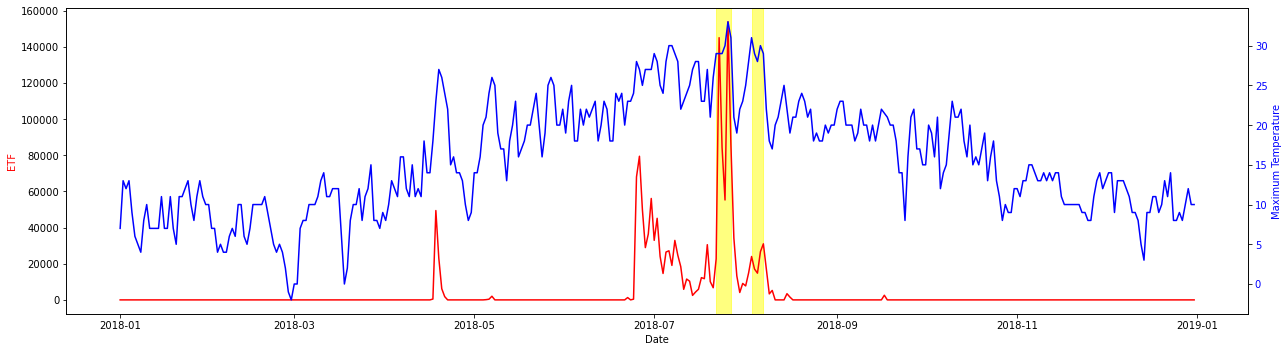

In [25]:
fig, ax1 = plt.subplots(figsize = [18,5])

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('ETF', color='r')
ax1.plot(data_UK['DATE'], data_UK['ETF_new'], color='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Maximum Temperature', color='b')  # we already handled the x-label with ax1
ax2.plot(data_UK['DATE'], data_UK['MAX'], color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax1.axvspan(L[0], L[5], alpha=0.5, color='yellow')
ax1.axvspan(L[6], L[10], alpha=0.5, color='yellow')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

## Ireland

In [26]:
df = data_IR.loc[data_IR['HEATWAVE'] == 1]
L = df['DATE'].tolist()

In [27]:
print(L)

[]


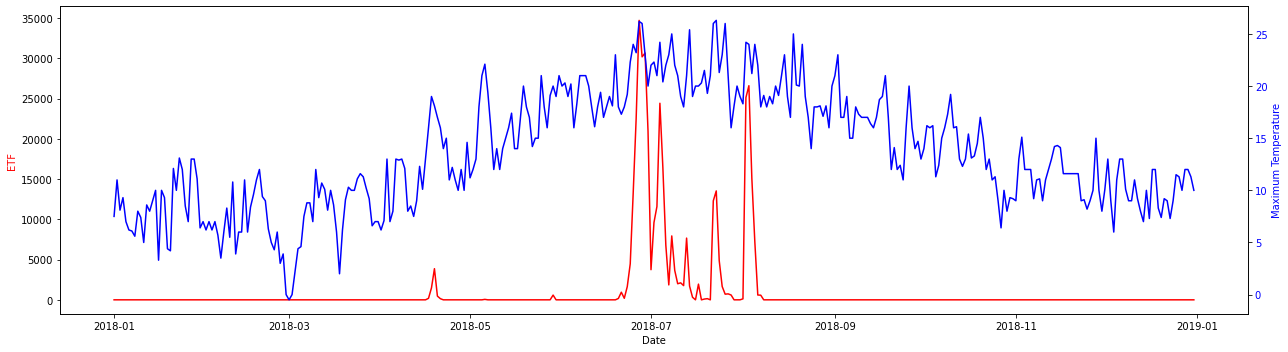

In [28]:
fig, ax1 = plt.subplots(figsize = [18,5])

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('ETF', color='r')
ax1.plot(data_IR['DATE'], data_IR['ETF_new'], color='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Maximum Temperature', color='b')  # we already handled the x-label with ax1
ax2.plot(data_IR['DATE'], data_IR['MAX'], color='b')
ax2.tick_params(axis='y', labelcolor='b')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

## Australia

In [29]:
df = data_AU.loc[data_AU['HEATWAVE'] == 1]
L = df['DATE'].tolist()

In [30]:
print(L)

[Timestamp('2018-01-05 00:00:00'), Timestamp('2018-01-06 00:00:00'), Timestamp('2018-01-07 00:00:00'), Timestamp('2018-01-08 00:00:00'), Timestamp('2018-01-09 00:00:00'), Timestamp('2018-01-18 00:00:00'), Timestamp('2018-01-19 00:00:00'), Timestamp('2018-01-20 00:00:00'), Timestamp('2018-01-21 00:00:00'), Timestamp('2018-01-22 00:00:00'), Timestamp('2018-01-23 00:00:00'), Timestamp('2018-02-07 00:00:00'), Timestamp('2018-02-08 00:00:00'), Timestamp('2018-02-09 00:00:00'), Timestamp('2018-02-10 00:00:00'), Timestamp('2018-02-11 00:00:00'), Timestamp('2018-12-26 00:00:00'), Timestamp('2018-12-27 00:00:00'), Timestamp('2018-12-28 00:00:00'), Timestamp('2018-12-29 00:00:00'), Timestamp('2018-12-30 00:00:00'), Timestamp('2018-12-31 00:00:00')]


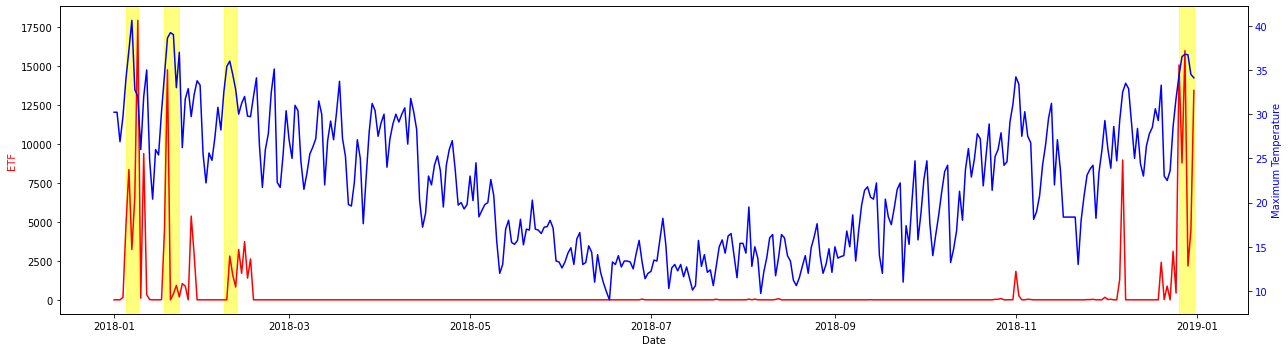

In [31]:
fig, ax1 = plt.subplots(figsize = [18,5])

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('ETF', color='r')
ax1.plot(data_AU['DATE'], data_AU['ETF_new'], color='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Maximum Temperature', color='b')  # we already handled the x-label with ax1
ax2.plot(data_AU['DATE'], data_AU['MAX'], color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax1.axvspan(L[0], L[4], alpha=0.5, color='yellow')
ax1.axvspan(L[5], L[10], alpha=0.5, color='yellow')
ax1.axvspan(L[11], L[15], alpha=0.5, color='yellow')
ax1.axvspan(L[16], L[-1], alpha=0.5, color='yellow')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

## India

In [32]:
df = data_IN.loc[data_IN['HEATWAVE'] == 1]
L = df['DATE'].tolist()

In [33]:
print(L)

[Timestamp('2018-05-22 00:00:00'), Timestamp('2018-05-23 00:00:00'), Timestamp('2018-05-24 00:00:00'), Timestamp('2018-05-25 00:00:00'), Timestamp('2018-05-26 00:00:00'), Timestamp('2018-05-27 00:00:00'), Timestamp('2018-05-28 00:00:00'), Timestamp('2018-05-29 00:00:00')]


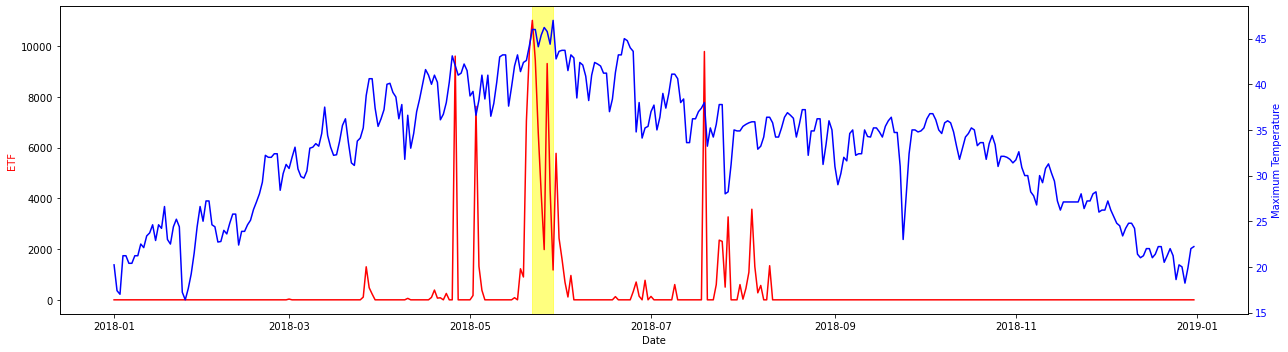

In [34]:
fig, ax1 = plt.subplots(figsize = [18,5])

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('ETF', color='r')
ax1.plot(data_IN['DATE'], data_IN['ETF_new'], color='r')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Maximum Temperature', color='b')  # we already handled the x-label with ax1
ax2.plot(data_IN['DATE'], data_IN['MAX'], color='b')
ax2.tick_params(axis='y', labelcolor='b')


ax1.axvspan(L[0], L[-1], alpha=0.5, color='yellow')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()